# Kmean - Algorithm

<b> Step 1: </b> Random Centriods <br>
<b> Step 2: </b> Label data points <br>
<b> Step 3: </b> Recalculated the new Centroids

Repeat 2)-3) if the new centroid have changed postions <br>
Stop when centroids remain the same

# Preparation

import ไลบรารี่ที่จำเป็น

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Read datasets: created with 3 different Gaussian distributions (3 classes)

In [19]:
import pandas as pd

# โหลดไฟล์ Excel
xls = pd.ExcelFile("/content/tech_stocks_cleaned.xlsx")

# รายชื่อหุ้น (ชื่อ sheet)
tickers = xls.sheet_names

# ดึงข้อมูลของแต่ละหุ้นเก็บไว้
data_dict = {}

for ticker in tickers:
    df = xls.parse(ticker)

    # แปลง Date เป็น datetime ถ้ายังไม่แปลง
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)

    # คำนวณผลตอบแทนรายวัน
    df["Return"] = df["Close"].pct_change()

    # เก็บไว้
    data_dict[ticker] = df


In [20]:
print(xls.sheet_names)

['AAPL', 'ACN', 'ADBE', 'ADI', 'ADSK', 'AKAM', 'AMAT', 'AMD', 'ANET', 'ANSS', 'APH', 'AVGO', 'CDNS', 'CDW', 'CRM', 'CRWD', 'CSCO', 'CTSH', 'DELL', 'ENPH', 'EPAM', 'FFIV', 'FICO', 'FSLR', 'FTNT', 'GDDY', 'GEN', 'GLW', 'HPE', 'HPQ', 'IBM', 'INTC', 'INTU', 'IT', 'JBL', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'MCHP', 'MPWR', 'MSFT', 'MSI', 'MU', 'NOW', 'NTAP', 'NVDA', 'NXPI', 'ON', 'ORCL', 'PANW', 'PLTR', 'PTC', 'QCOM', 'ROP', 'SMCI', 'SNPS', 'STX', 'SWKS', 'TDY', 'TEL', 'TER', 'TRMB', 'TXN', 'TYL', 'VRSN', 'WDAY', 'WDC', 'ZBRA']


In [21]:
import pandas as pd

# โหลดเฉพาะ 3 หุ้นตัวอย่างจากไฟล์ Excel
xls = pd.ExcelFile("tech_stocks_cleaned.xlsx")
tickers = ["AAPL", "MSFT", "NVDA"]

# สร้าง dict เก็บข้อมูล
data_dict = {}

for ticker in tickers:
    df = xls.parse(ticker)
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)
    df["Return"] = df["Close"].pct_change()
    data_dict[ticker] = df


In [23]:
tickers

['AAPL', 'MSFT', 'NVDA']

In [6]:
df = pd.read_excel("/content/tech_stocks_cleaned.xlsx", index_col = 0, parse_dates= True)
type(df)

pandas.core.frame.DataFrame

In [7]:
stock = df.copy()
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,72.620857,72.681304,71.373233,71.627107,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200
2020-01-07,72.146950,72.753831,71.926922,72.497537,108872000
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200


In [25]:
import numpy as np
import pandas as pd

# สมมุติคุณมี DataFrame ของราคาหุ้น
# โดยมีคอลัมน์ 'Close' และ 'Date' เป็น index แล้ว
# เช่น: df = data_dict["AAPL"]

df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))


In [26]:
for ticker, df in data_dict.items():
    df["LogReturn"] = np.log(df["Close"] / df["Close"].shift(1))
    data_dict[ticker] = df


In [27]:
df.dropna(subset=["LogReturn"], inplace=True)


In [28]:

    # เก็บไว้ใน dict
    data_dict[ticker] = df

    # แสดงผลลัพธ์ 5 แถวแรกของแต่ละหุ้น
    print(f"🔹 {ticker}")
    print(df[["Close", "LogReturn"]].head(), "\n")

🔹 NVDA
               Close  LogReturn
Date                           
2020-01-03  5.852019  -0.015406
2020-01-06  5.782820  -0.011895
2020-01-07  5.929181   0.024995
2020-01-08  5.968013   0.006528
2020-01-09  6.069820   0.016915 



In [32]:
import pandas as pd
import numpy as np
feature_rows = []


for ticker in xls.sheet_names:
    df = xls.parse(ticker)
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)

    df["LogReturn"] = np.log(df["Close"] / df["Close"].shift(1))
    df.dropna(subset=["LogReturn"], inplace=True)

    mean_log_ret = df["LogReturn"].mean()
    std_log_ret = df["LogReturn"].std()

    # เก็บเป็น dictionary แล้วใส่ใน list
    feature_rows.append({
        "Ticker": ticker,
        "MeanLogReturn": mean_log_ret,
        "Volatility": std_log_ret
    })

# แปลง list เป็น DataFrame ทีเดียว
features = pd.DataFrame(feature_rows)

# แสดงผล
print(features.head())


  Ticker  MeanLogReturn  Volatility
0   AAPL       0.001000    0.020212
1    ACN       0.000468    0.018032
2   ADBE       0.000234    0.023659
3    ADI       0.000534    0.020467
4   ADSK       0.000369    0.024292


In [33]:
print(features.isna().sum())


Ticker           0
MeanLogReturn    0
Volatility       0
dtype: int64


In [34]:
features.describe()

,MeanLogReturn,Volatility
count,69.000000,69.000000
mean,0.000685,0.024932
std,0.000535,0.006933
min,-0.000778,0.015716
25%,0.000368,0.019930
50%,0.000570,0.023925
75%,0.000969,0.027201
max,0.002485,0.048308


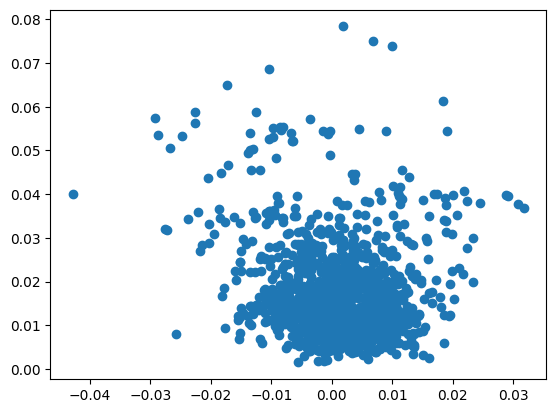

In [37]:
plt.scatter(stock['Rets_mean'], stock['Rets_std'])


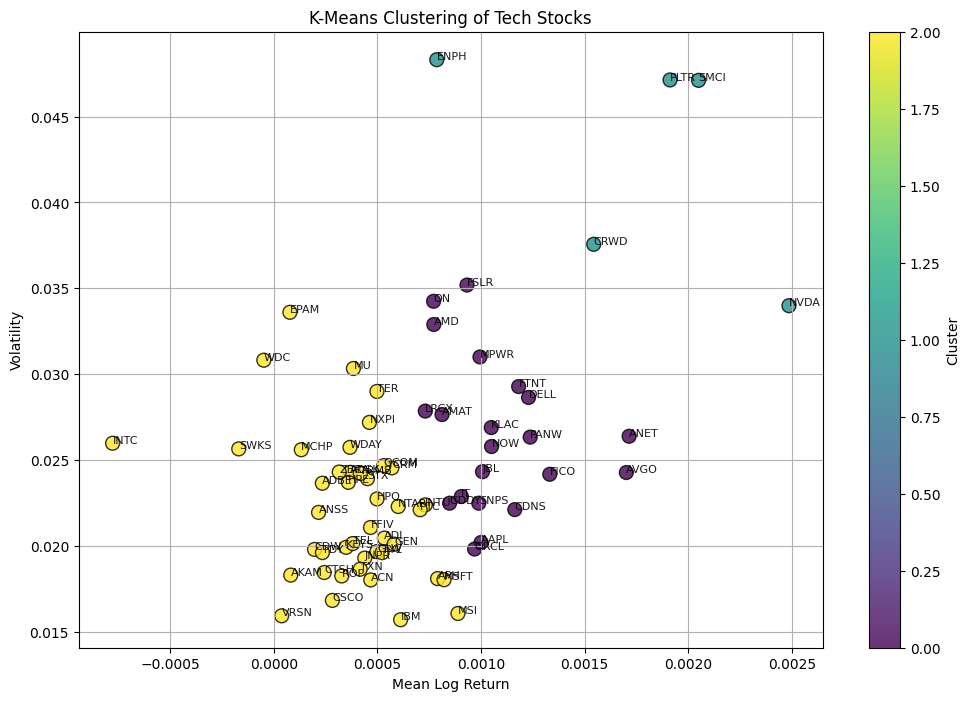

In [59]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# เตรียมข้อมูล X จาก features
X1 = features['MeanLogReturn'].values
X2 = features['Volatility'].values
X = np.array(list(zip(X1, X2)))

# สเกลข้อมูลก่อนทำ K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ทำ K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
features['Cluster'] = clusters

# พล็อตกราฟพร้อมสีตาม Cluster
plt.figure(figsize=(12,8))
scatter = plt.scatter(features['MeanLogReturn'], features['Volatility'],
                      c=features['Cluster'], cmap='viridis', s=100, edgecolors='k', alpha=0.8)

# แสดงชื่อหุ้น (annotation)
for i, row in features.iterrows():
    plt.text(row['MeanLogReturn'], row['Volatility'], row['Ticker'], fontsize=8, alpha=0.9)

plt.xlabel('Mean Log Return')
plt.ylabel('Volatility')
plt.title('K-Means Clustering of Tech Stocks')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()


In [60]:
# ส่งออกไฟล์ Excel พร้อมข้อมูล Cluster
features.to_excel("clustered_tech_stocks.xlsx", index=False)

print("ส่งออกไฟล์ clustered_tech_stocks.xlsx เรียบร้อยแล้ว")


ส่งออกไฟล์ clustered_tech_stocks.xlsx เรียบร้อยแล้ว


In [61]:
# 1. เตรียมข้อมูลสำหรับทำ K-Means

import numpy as np

X = np.array(list(zip(features['MeanLogReturn'], features['Volatility'])))


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [64]:
features['Cluster'] = clusters


In [65]:
print(features.head())


  Ticker  MeanLogReturn  Volatility  Cluster
0   AAPL       0.001000    0.020212        0
1    ACN       0.000468    0.018032        2
2   ADBE       0.000234    0.023659        2
3    ADI       0.000534    0.020467        2
4   ADSK       0.000369    0.024292        2


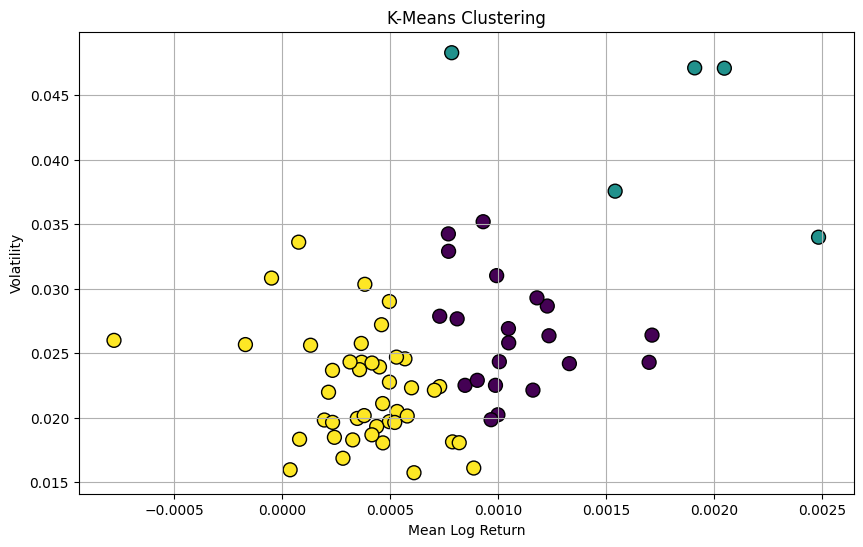

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(features['MeanLogReturn'], features['Volatility'], c=features['Cluster'], cmap='viridis', s=100, edgecolors='k')
plt.xlabel('Mean Log Return')
plt.ylabel('Volatility')
plt.title('K-Means Clustering')
plt.grid(True)
plt.show()


7. วิเคราะห์ผลลัพธ์จาก Cluster
ดูว่าแต่ละกลุ่ม (Cluster) มีลักษณะยังไง

เช่น กลุ่มไหนความเสี่ยงสูง ผลตอบแทนสูง กลุ่มไหนความเสี่ยงต่ำ ผลตอบแทนต่ำ

จะช่วยให้คุณเลือกหุ้นหรือตั้งกลยุทธ์ลงทุนตามกลุ่มได้

In [67]:
for c in features['Cluster'].unique():
    print(f"Cluster {c}:")
    print(features[features['Cluster'] == c][['MeanLogReturn', 'Volatility']].describe())
    print()


Cluster 0:
       MeanLogReturn  Volatility
count      21.000000   21.000000
mean        0.001066    0.026433
std         0.000269    0.004338
min         0.000731    0.019831
25%         0.000905    0.022887
50%         0.001000    0.026344
75%         0.001181    0.028651
max         0.001714    0.035194

Cluster 2:
       MeanLogReturn  Volatility
count      43.000000   43.000000
mean        0.000374    0.022119
std         0.000288    0.004175
min        -0.000778    0.015716
25%         0.000239    0.018981
50%         0.000417    0.021962
75%         0.000527    0.024433
max         0.000889    0.033607

Cluster 1:
       MeanLogReturn  Volatility
count       5.000000    5.000000
mean        0.001755    0.042821
std         0.000638    0.006569
min         0.000786    0.033993
25%         0.001543    0.037566
50%         0.001912    0.047107
75%         0.002049    0.047132
max         0.002485    0.048308



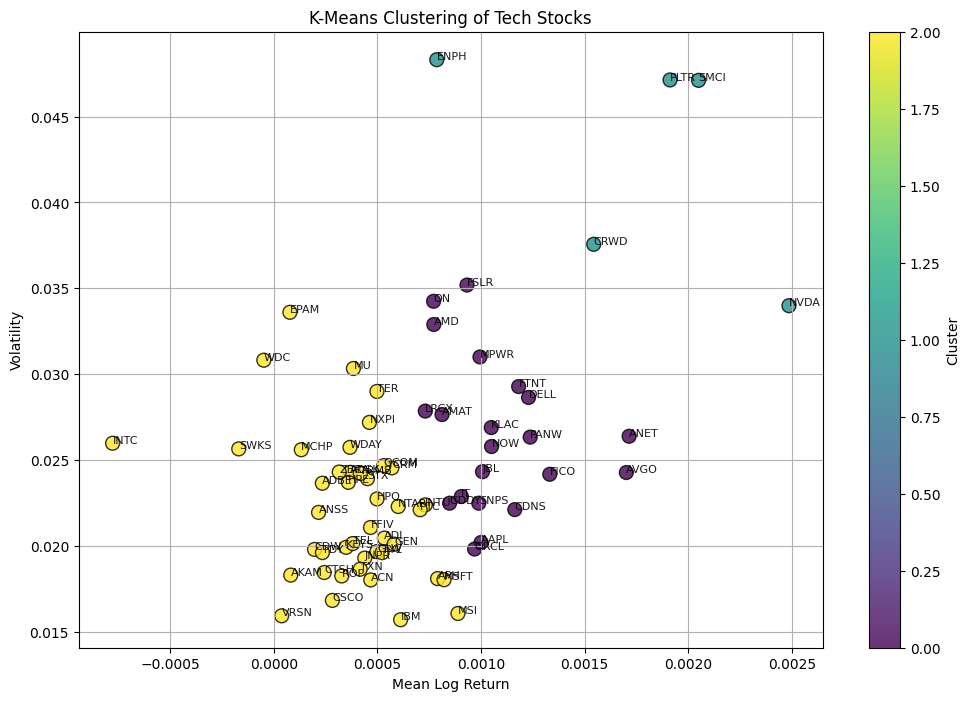

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
scatter = plt.scatter(features['MeanLogReturn'], features['Volatility'],
                      c=features['Cluster'], cmap='viridis', s=100, edgecolors='k', alpha=0.8)

for i, row in features.iterrows():
    plt.text(row['MeanLogReturn'], row['Volatility'], row['Ticker'], fontsize=8, alpha=0.9)

plt.xlabel('Mean Log Return')
plt.ylabel('Volatility')
plt.title('K-Means Clustering of Tech Stocks')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()


In [69]:
for c in features['Cluster'].unique():
    print(f"Cluster {c} summary:")
    print(features[features['Cluster'] == c][['MeanLogReturn', 'Volatility']].describe())
    print()


Cluster 0 summary:
       MeanLogReturn  Volatility
count      21.000000   21.000000
mean        0.001066    0.026433
std         0.000269    0.004338
min         0.000731    0.019831
25%         0.000905    0.022887
50%         0.001000    0.026344
75%         0.001181    0.028651
max         0.001714    0.035194

Cluster 2 summary:
       MeanLogReturn  Volatility
count      43.000000   43.000000
mean        0.000374    0.022119
std         0.000288    0.004175
min        -0.000778    0.015716
25%         0.000239    0.018981
50%         0.000417    0.021962
75%         0.000527    0.024433
max         0.000889    0.033607

Cluster 1 summary:
       MeanLogReturn  Volatility
count       5.000000    5.000000
mean        0.001755    0.042821
std         0.000638    0.006569
min         0.000786    0.033993
25%         0.001543    0.037566
50%         0.001912    0.047107
75%         0.002049    0.047132
max         0.002485    0.048308



In [70]:
features.to_excel("tech_stocks_clustered.xlsx", index=False)


===== Results for k = 2 =====
         MeanLogReturn  Volatility
Cluster                           
0             0.000601    0.023534
1             0.001755    0.042821



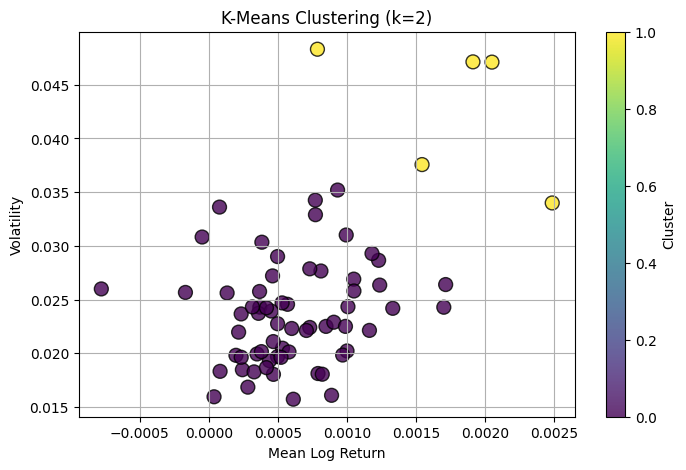

===== Results for k = 4 =====
         MeanLogReturn  Volatility
Cluster                           
0             0.001071    0.026763
1             0.001755    0.042821
2             0.000477    0.019393
3             0.000246    0.026314



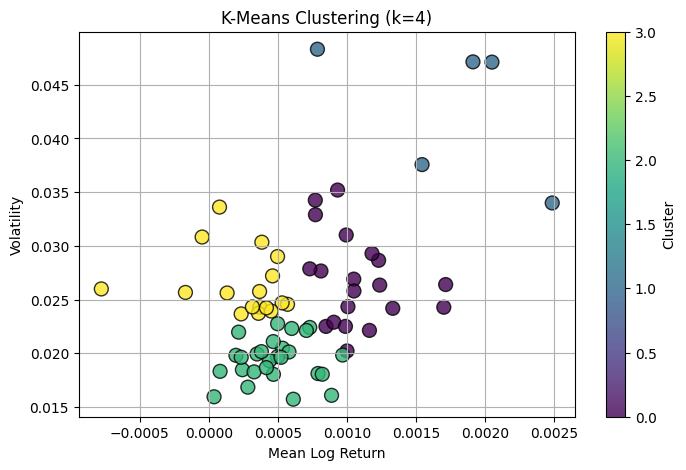

===== Results for k = 5 =====
         MeanLogReturn  Volatility
Cluster                           
0             0.001113    0.024808
1             0.002149    0.042744
2             0.000459    0.019376
3             0.000246    0.026314
4             0.000967    0.036538



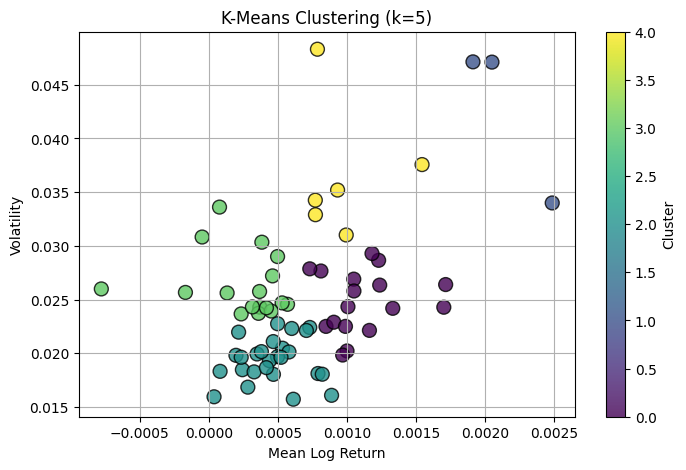

In [71]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.array(list(zip(features['MeanLogReturn'], features['Volatility'])))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for k in [2, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    features['Cluster'] = clusters

    print(f"===== Results for k = {k} =====")
    print(features.groupby('Cluster')[['MeanLogReturn', 'Volatility']].mean())
    print()

    plt.figure(figsize=(8,5))
    scatter = plt.scatter(features['MeanLogReturn'], features['Volatility'],
                          c=features['Cluster'], cmap='viridis', s=100, edgecolors='k', alpha=0.8)
    plt.xlabel('Mean Log Return')
    plt.ylabel('Volatility')
    plt.title(f'K-Means Clustering (k={k})')
    plt.grid(True)
    plt.colorbar(scatter, label='Cluster')
    plt.show()


In [72]:
kmeans = KMeans(n_clusters=3, max_iter=300, tol=1e-4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [73]:
import numpy as np

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def kmeans_manual(X, k, max_iters=100, tol=1e-4):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for i in range(max_iters):
        clusters = []
        for x in X:
            distances = [euclidean_distance(x, c) for c in centroids]
            clusters.append(np.argmin(distances))
        clusters = np.array(clusters)

        new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

        # ถ้า centroids ไม่เปลี่ยนแปลงเกิน tol หยุด loop
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            print(f"Converged at iteration {i+1}")
            break
        centroids = new_centroids

    return clusters, centroids

# ใช้งาน
clusters, centroids = kmeans_manual(X_scaled, k=3)


Converged at iteration 5


In [75]:
print(len(tickers))  # ต้องเท่ากับ 69
print(len(features)) # ต้องเท่ากับ 69


3
69


In [77]:
tickers = xls.sheet_names  # สมมติใช้ xls = pd.ExcelFile('ไฟล์ของคุณ.xlsx')


In [78]:
features['Ticker'] = tickers


In [79]:
import pandas as pd

# สมมติคุณมีชื่อหุ้นในตัวแปร tickers
features = pd.DataFrame(X_scaled, columns=['MeanLogReturn_scaled', 'Volatility_scaled'])
features['Cluster'] = clusters
features['Ticker'] = tickers  # ใส่ชื่อหุ้นให้ตรงกับลำดับข้อมูล

print(features.head())


   MeanLogReturn_scaled  Volatility_scaled  Cluster Ticker
0              0.593535          -0.685768        1   AAPL
1             -0.408496          -1.002518        1    ACN
2             -0.847917          -0.184902        2   ADBE
3             -0.284921          -0.648668        1    ADI
4             -0.593640          -0.093038        2   ADSK


In [81]:
print(features.columns)


Index(['MeanLogReturn_scaled', 'Volatility_scaled', 'Cluster', 'Ticker'], dtype='object')


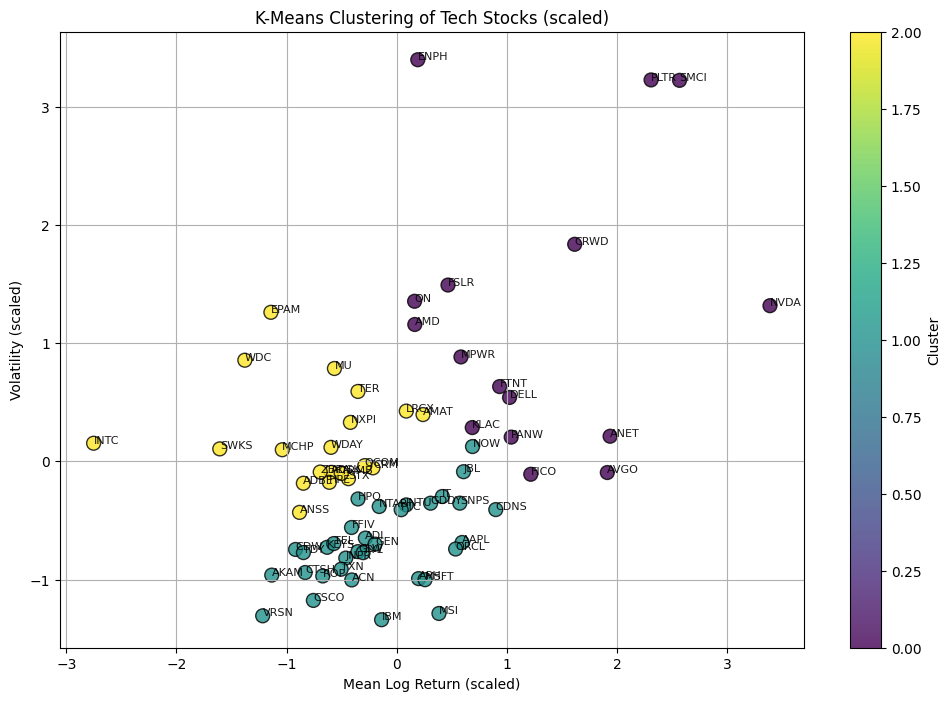

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
scatter = plt.scatter(features['MeanLogReturn_scaled'], features['Volatility_scaled'],
                      c=features['Cluster'], cmap='viridis', s=100, edgecolors='k', alpha=0.8)

for i, row in features.iterrows():
    plt.text(row['MeanLogReturn_scaled'], row['Volatility_scaled'], row['Ticker'], fontsize=8, alpha=0.9)

plt.xlabel('Mean Log Return (scaled)')
plt.ylabel('Volatility (scaled)')
plt.title('K-Means Clustering of Tech Stocks (scaled)')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()


In [83]:
for c in features['Cluster'].unique():
    group = features[features['Cluster'] == c]
    print(f"--- Cluster {c} ---")
    print(f"จำนวนหุ้น: {len(group)}")
    print(f"Mean Log Return (scaled):")
    print(f"  ค่าเฉลี่ย: {group['MeanLogReturn_scaled'].mean():.4f}")
    print(f"  ส่วนเบี่ยงเบนมาตรฐาน: {group['MeanLogReturn_scaled'].std():.4f}")
    print(f"Volatility (scaled):")
    print(f"  ค่าเฉลี่ย: {group['Volatility_scaled'].mean():.4f}")
    print(f"  ส่วนเบี่ยงเบนมาตรฐาน: {group['Volatility_scaled'].std():.4f}")
    print(f"ตัวอย่างหุ้นในกลุ่ม: {', '.join(group['Ticker'].head(5).tolist())}")
    print()


--- Cluster 1 ---
จำนวนหุ้น: 33
Mean Log Return (scaled):
  ค่าเฉลี่ย: -0.1691
  ส่วนเบี่ยงเบนมาตรฐาน: 0.5668
Volatility (scaled):
  ค่าเฉลี่ย: -0.7078
  ส่วนเบี่ยงเบนมาตรฐาน: 0.3489
ตัวอย่างหุ้นในกลุ่ม: AAPL, ACN, ADI, AKAM, APH

--- Cluster 2 ---
จำนวนหุ้น: 20
Mean Log Return (scaled):
  ค่าเฉลี่ย: -0.7305
  ส่วนเบี่ยงเบนมาตรฐาน: 0.6528
Volatility (scaled):
  ค่าเฉลี่ย: 0.1902
  ส่วนเบี่ยงเบนมาตรฐาน: 0.4213
ตัวอย่างหุ้นในกลุ่ม: ADBE, ADSK, AMAT, ANSS, CRM

--- Cluster 0 ---
จำนวนหุ้น: 16
Mean Log Return (scaled):
  ค่าเฉลี่ย: 1.2619
  ส่วนเบี่ยงเบนมาตรฐาน: 0.9497
Volatility (scaled):
  ค่าเฉลี่ย: 1.2221
  ส่วนเบี่ยงเบนมาตรฐาน: 1.1713
ตัวอย่างหุ้นในกลุ่ม: AMD, ANET, AVGO, CRWD, DELL



In [84]:
features.to_excel("tech_stocks_with_clusters.xlsx", index=False)


In [85]:
with pd.ExcelWriter("tech_stocks_clustered_separated.xlsx") as writer:
    for c in features['Cluster'].unique():
        group_df = features[features['Cluster'] == c]
        group_df.to_excel(writer, sheet_name=f'Cluster_{c}', index=False)


In [86]:
group_summary = features.groupby('Cluster')[['MeanLogReturn_scaled', 'Volatility_scaled']].mean()
print(group_summary)


         MeanLogReturn_scaled  Volatility_scaled
Cluster                                         
0                    1.261859           1.222102
1                   -0.169060          -0.707803
2                   -0.730538           0.190193
